In [ ]:
#Introduction to Image Segmentation with K-Means clustering

https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import random

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
original_image = cv2.imread("/Users/su/Desktop/image-segmentation-tutorial/image3.jpg")
#original_image = cv2.imread("/Users/su/Desktop/main-image.jpeg")

In [4]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [5]:
vectorized = img.reshape((-1,3))

Next, converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.

In [6]:
vectorized = np.float32(vectorized)

We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [7]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [8]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [9]:
center = np.uint8(center)

In [10]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

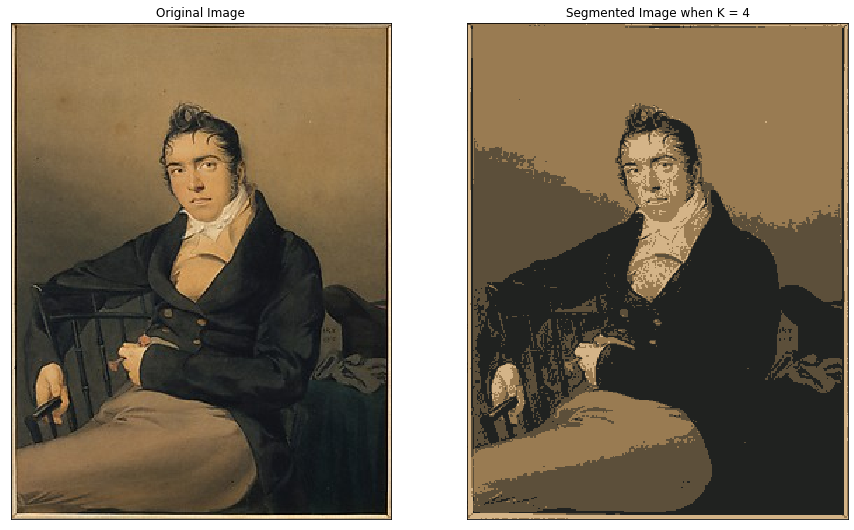

In [11]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
figure_size = 15
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

Image segmentation creates a pixel-wise mask for each object in the image. This technique gives us a far more granular understanding of the object(s) in the image.

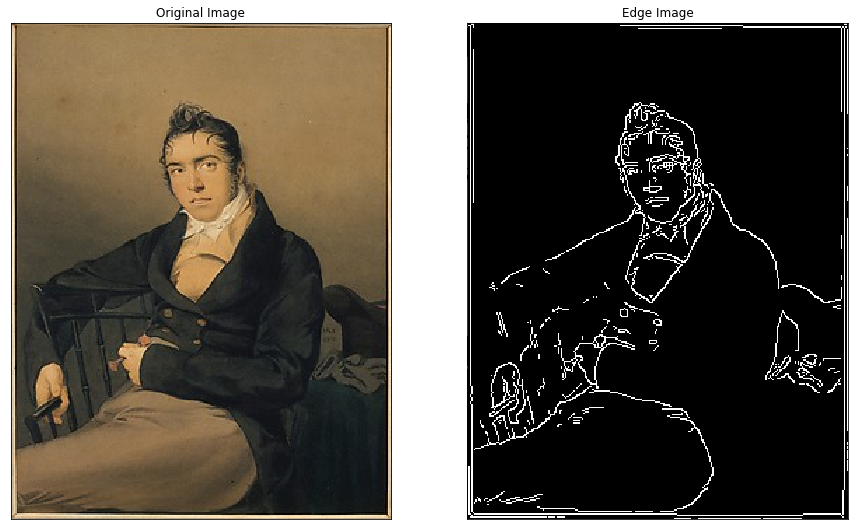

In [12]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
Potential Approaches: 

# APPROACH 1 

A. Import a pretrained model from Keras (here VGG16)

B. Extract features per image

C. Do kmeans

D. Export by copying with cluster label

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

# Variables
imdir = 
targetdir = 
number_clusters = 3

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

# Copy images renamed by cluster 
# Check if target dir exists
try:
    os.makedirs(targetdir)
except OSError:
    pass
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir + str(m) + "_" + str(i) + ".jpg")
    
    
#https://stackoverflow.com/questions/39123421/image-clustering-by-its-similarity-in-python

# APPROACH 2

1: implement SIFT or SURF to find key point descriptors for all images.
    
SIFT AND SURF = 



2: Apply k-means or some clustering algorithm to cluster them on the basis of similarity in key points.

3:   Whenever clustering algorithm coverges you can find the number of clusters.  where each cluster will contain similar images.



# APROACH 3 :
    
Find a python script to organize your images by similarity

It uses a k-means algorithm to separatem them in clusters

call the script passing the image folder you want to organize.